## Victoria Case

**Deskripsi Dataset :** <br>
Dataset yang digunakan merupakan data deskripsi dari lingkungan serta wilayah konservasi apartemen yang ada di Victoria. <br>
Dataset yang digunakan terdiri atas 218 pengamatan dengan 16 feature diantaranya : <br>

- Total price
- Area
- Zone
- Category
- Age
- Floor
- Rooms
- Out
- Conservation
- Toilets
- Garage
- Elevator
- Street Category
- Heating
- Tras

**Deskripsi Project :** <br>
Pada case ini akan ditentukan model terbaik dengan menggunakan regresi untuk membantu broker dalam memprediksi harga apartemen di Victoria berdasarkan lingkungan sekitarnya serta status konservasi. Model terbaik akan digunakan untuk memprediksi dan menjelaskan kembali konservasi yang baru kedalam 3 level yakni : <br>

- Level A : 1A
- Level B : 2A
- Level C : 2B dan 3A

## 1. Import Dataset

**Import Library dan Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
victoria=pd.read_csv('victoria.csv')
victoria.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [3]:
victoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
row.labels        218 non-null int64
totalprice        218 non-null object
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(8), object(8)
memory usage: 27.3+ KB


**Data Preparation**

Dikehui untuk variabel total price dan area memiliki tipe data object. Selain itu, pada dua variabel tersebut masih dijumpai ',' untuk memisahkan nominal dari masing-masing angka dimana seharusnya pemisah yang digunakan adalah '.' sehingga harus diganti agar dapat dilakukan analisis lebih lanjut.

In [4]:
victoria['totalprice'] = victoria['totalprice'].replace(r'[,]','', regex=True)
victoria['area'] = victoria['area'].replace(r'[,]','', regex=True)
victoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
row.labels        218 non-null int64
totalprice        218 non-null object
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(8), object(8)
memory usage: 27.3+ KB


Setelah melakukan replace dari ',' menjadi '.' dilakukan pengecekan tipe data untuk keduanya. Selelah itu, agar dapat dilakukan analisis pada variabel total price dan area maka tipe data akan diubah kedalam numerik. 

In [5]:
victoria['totalprice'] = pd.to_numeric(victoria['totalprice'])
victoria['area'] = pd.to_numeric(victoria['area'])
victoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
row.labels        218 non-null int64
totalprice        218 non-null int64
area              218 non-null int64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(10), object(6)
memory usage: 27.3+ KB


Dikarenakan dua variabel tersebut memiliki tipe data integer maka dapat dilakukan analisis lebih lanjut menggunakan kedua variabel tersebut.

## 2. Exploratory Data Analysis

Untuk mengetahui karakteristik dari dataset Apartement Price in Victoria dapat menggunakan statistika deskriptif. Selain itu, akan dilakukan visualisasi dengan menggunakan beberapa grafik untuk mengetahui secara visual.

### **Statistika Deskriptif**

In [6]:
victoria=victoria.drop(['row.labels'],axis=1)

In [8]:
victoria.describe().round(3)

,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
count,218.000,2.180000e+02,218.000,218.000,218.000,218.000,218.000,218.000,218.000
mean,288543.541,5.718657e+09,19.899,4.440,4.853,1.468,0.243,0.798,0.807
std,128972.262,3.455007e+09,14.596,2.127,0.634,0.500,0.451,0.402,0.407
min,155000.000,5.300000e+01,1.000,1.000,3.000,1.000,0.000,0.000,0.000
25%,230000.000,1.187250e+09,11.000,3.000,5.000,1.000,0.000,1.000,1.000
50%,270000.000,7.118500e+09,16.000,4.000,5.000,1.000,0.000,1.000,1.000
75%,329750.000,8.542750e+09,24.000,5.000,5.000,2.000,0.000,1.000,1.000
max,1889822.000,9.992000e+09,118.000,12.000,7.000,2.000,2.000,1.000,2.000


1. **Harga apartemen** paling tinggi di Victoria adalah 1.889.822 sedangkan harga paling rendah adalah 155.000 dengan rata-rata harga 288.543,541.
2. Rata-rata **usia apartemen** di Victoria adalah 19,899 tahun. Bangunan apartemen paling tua adalah 118 tahun dan paling muda 1 tahun.
3. Jumlah **lantai apartemen** paling tinggi sebanyak 12 lantai dan paling rendah 1 lantai dengan **jumlah ruangan** paling tinggi 7 dan paling rendah 3 ruangan pada masing-masing apartemen.
4. Jumlah **kamar mandi** pada masing-masing apartement paling banyak 2 kamar mandi dan paling sedikit 1 kamar mandi.


### **Visualisasi Data**

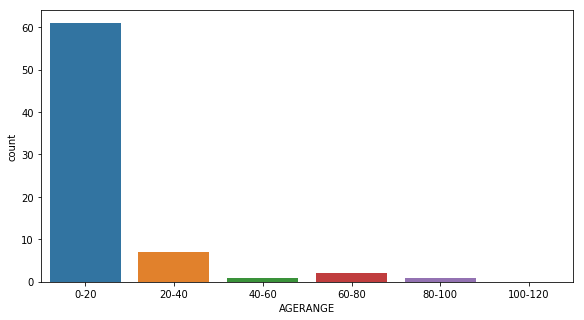

In [11]:
bins = [20,40,60,80,100,120, np.inf]
label = ['0-20','20-40', '40-60', '60-80','80-100','100-120']

victoria['AGERANGE'] = pd.cut(victoria['age'], bins, labels=label)

f = plt.figure(figsize=(21,5))
f.add_subplot(1,2,1)
sns.countplot(victoria['AGERANGE'])
plt.show()

Rata-rata usia apartemen di Victoria paling banyak berada pada range 0 hingga 20 tahun

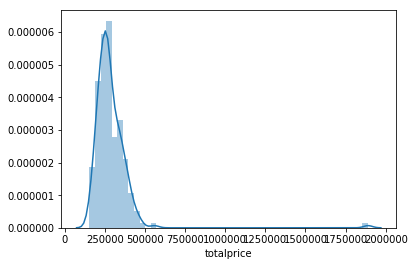

In [12]:
sns.distplot(victoria['totalprice'])

Persebaran harga apartemen paling banyak berkisar dari range harga 200.000 hingga 300.000 dan terpusat di harga 250.000

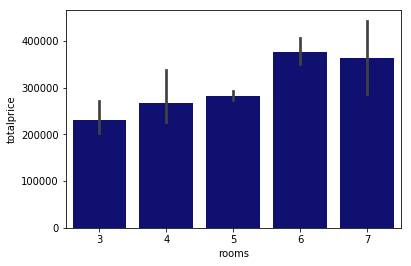

In [15]:
sns.barplot(data=victoria, x=victoria['rooms'], y=victoria['totalprice'], color='navy')

Dilihat dari barplot diketahui bahwa **jumlah ruangan banyak maka totalprice akan semakin tinggi.**

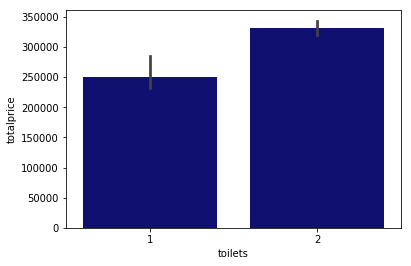

In [16]:
sns.barplot(data=victoria, x=victoria['toilets'], y=victoria['totalprice'], color='navy')

Jumlah toilet banyak menyebabkan harga apartemen semakin meningkat.

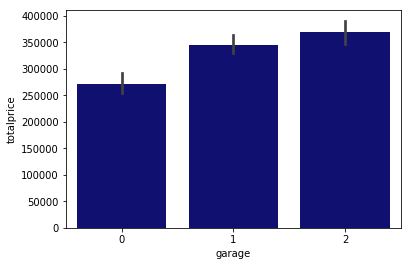

In [17]:
sns.barplot(data=victoria, x=victoria['garage'], y=victoria['totalprice'], color='navy')

Semakin banyak jumlah garasi, harga apartemen semakin tinggi. 

Dari ketiga barplot dapat diketahui bahwa semakin meningkat jumlah **toilet, ruangan, dan garasi** maka harga apartemen akan semakin tinggi.

### Variabel Selection

In [13]:
victoria.corr()

,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
totalprice,1.000000,-0.189643,-0.075187,0.003118,0.200678,0.312584,0.248644,0.153959,0.172438
area,-0.189643,1.000000,-0.140286,-0.017649,-0.275234,-0.275006,-0.177064,-0.000032,0.003843
age,-0.075187,-0.140286,1.000000,-0.081243,-0.082745,-0.280751,-0.214034,-0.409242,-0.266408
floor,0.003118,-0.017649,-0.081243,1.000000,0.130113,0.104329,-0.030462,0.201292,-0.119861
rooms,0.200678,-0.275234,-0.082745,0.130113,1.000000,0.420892,0.205930,0.352912,0.032771
toilets,0.312584,-0.275006,-0.280751,0.104329,0.420892,1.000000,0.453729,0.448640,0.218621
garage,0.248644,-0.177064,-0.214034,-0.030462,0.205930,0.453729,1.000000,0.271774,0.156053
elevator,0.153959,-0.000032,-0.409242,0.201292,0.352912,0.448640,0.271774,1.000000,0.211845
tras,0.172438,0.003843,-0.266408,-0.119861,0.032771,0.218621,0.156053,0.211845,1.000000


Berdasarkan tabel korelasi, variabel yang memiliki nilai korelasi paling tinggi dengan total price adalah variabel toilet, garage, dan rooms sehingga pada pemodelan akan menggunakan ketiga variabel tersebut.

### Modelling

Pemodelan yang digunakan adalah dengan mengggunakan regresi. Sebelumnya, akan dilakukan penghapusan variabel yang tidak digunakan untuk pemodelan.
Setelah itu, menentukan variabel x dan variabel y agar dapat dilakukan pemodelan menggunakan regresi. <br>

- **Variabel x** : toilets, garage, rooms, conservation
- **Variabel y** : totalprice

Mengubah format variabel konservasi :

In [28]:
dicti = {
    '2B':3,
    '3A':3,
    '2A':2,
    '1A':1
}
victoria['conservation'] = victoria['conservation'].replace(dicti)

In [29]:
model=['totalprice','toilets','garage','rooms','conservation']
pemodelan=victoria[model]
pemodelan.head()

,totalprice,toilets,garage,rooms,conservation
0,228000,1,0,5,3
1,409000,2,1,5,1
2,200000,2,0,5,1
3,180000,1,0,4,2
4,443600,2,0,7,1


In [30]:
x = pemodelan.drop(columns = ['totalprice'])
y = pemodelan['totalprice']

In [31]:
lin_reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Model Training**

Pemodelan dilakukan menggunakan data training. Selanjutnya akan dilakukan pengecekan nilai MAE (Mean Absolute Error) dan MAPE (Mean Absolute Percentage Error) dengan menggunakan data testing.

In [32]:
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [34]:
print(f' Nilai MAE yang dihasilkan sebesar {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE yang dihasilkan sebesar {mean_absolute_percentage_error(y_test, y_pred)}')

 Nilai MAE yang dihasilkan sebesar 35573.11283451031
Nilai MAPE yang dihasilkan sebesar 11.3704393259606


Berdasarkan pemodelan total price dengan variabel toilets, garage, dan rooms diketahui dengan melakukan perhitungan akurasi didapat **error yang terbentuk sebanyak 35.573 dengan persentase sebesar 11,37%.**